## **Setup Environment & Run Packages**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency


## **Load Data**

َAfter cleaning data, now we can import cleaned data.

In [2]:
data = pd.read_csv('../dataset/Cleaned_df.csv')
df = data.copy()

## **1-Variable Typecasting**

Because pandas is not very good when it comes to recognising the datatype of theimported variables. So in this section, we will be analysing the datatypes of each variables and converting them to respective types.

#### **1.1 - Integer & Float**

We must make sure which variables are numbers (Integer & Float). Just having number does not mean being quantitative.

In [3]:
df.dtypes[df.dtypes.isin(['int64', 'float64', pd.Int64Dtype()])]

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

We must convert `SeniorCitizen` to category data type.

In [4]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

#### **1.2 - Category**

In our dataset, we only have one variable that contain number, but it is category.

In [5]:
df.dtypes[df.dtypes == 'category']

SeniorCitizen    category
dtype: object

#### **1.3 - Object**

The rest of variables, are category (like `SeniorCitizen`), but just because they are string, they are object.

## **2-Univariat Analysis**

Univariate analysis refers to the statistical analysis of a single variable at a time. It focuses on understanding and summarizing the characteristics and patterns of a single variable without considering the relationships with other variables. The main objective of univariate analysis is to describe and analyze the distribution, central tendency, dispersion, and other relevant properties of a single variable.

#### **2.1 - Quantitative**

When dealing with quantitative variables, we have to check their properties like:
* Mean
* Median
* Standard Deviation
* Kurtosis / Skewness
* Distribution / Range

##### **2.1.1 - Build Function**

In [6]:
qnt_var = df.select_dtypes(include=['int64','float64','Int64']).dtypes
qnt_list = ['tenure','MonthlyCharges','TotalCharges']

Now, we make a custom function for easy and efficient analysis of quantitative univariate

In [7]:
def UVA_qnt(data, var_group):
  size = len(var_group)
  plt.figure(figsize=(7*size, 5), dpi=100)
  
  # Looping for each variable
  for j, i in enumerate(var_group):
    # Calculating descriptives of the variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max() - data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # Calculating points of standard deviation
    points = mean - st_dev, mean + st_dev

    # Plotting the variable with every information
    plt.subplot(1, size, j+1)
    sns.kdeplot(data[i], shade=True)
    # sns.lineplot(points, [0, 0], color='black', label="std_dev")
    plt.scatter([mini, maxi], [0, 0], color='orange', label="min/max")
    plt.scatter([mean], [0], color='red', label="mean")
    plt.scatter([median], [0], color='blue', label="median")
    plt.xlabel('{}'.format(i), fontsize=20)
    plt.ylabel('density')
    plt.axvline(mean, color ='red', linestyle ='dashed')
    plt.axvline(median, color ='blue', linestyle ='solid')
    plt.title('Std = {} \nkurtosis = {} \nskew = {} \nrange = {}\nmean = {} \nmedian = {}'.format(
        round(st_dev, 2),
        round(kurt, 2),
        round(skew, 2),
        (round(mini, 2), round(maxi, 2), round(ran, 2)),
        round(mean, 2),
        round(median, 2)
    ))


##### **2.1.2 - Calculations**

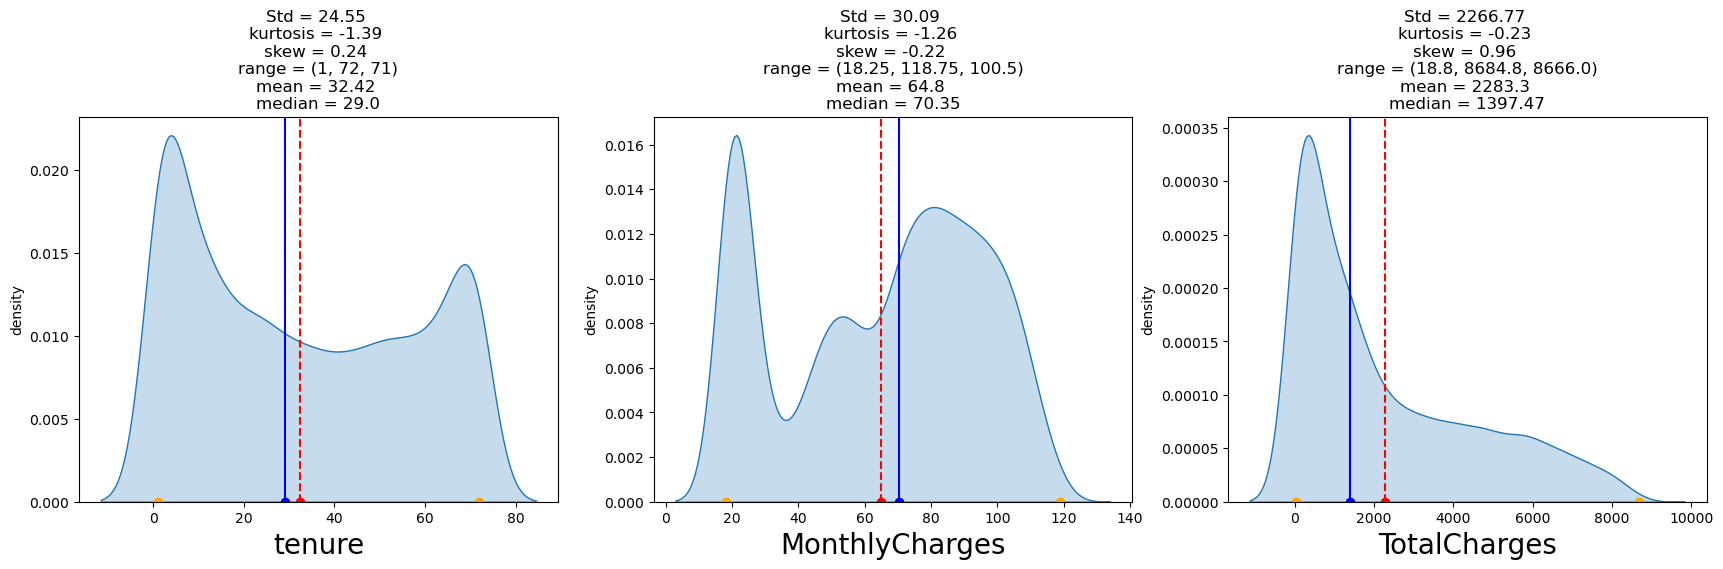

In [8]:
UVA_qnt(df , qnt_list)

<b>Summary</b>:

* `tenure` and `MonthlyCharges` are not skewed, but `TotalCharges` ir right skewed and it mean we have big outlier in this variable.
* %50 of users are using the services less than <u>29</u> month, pay less than <u>70.35</u> dollar monthly and less than <u>1397.47</u> dollar yearly.
* The minimum `tenure` is <u>1 month</u>, `MonthlyCharges` is <u>18.25</u> dollar and `TotalCharges` is <u>18.8</u> dollar.

#### **2.2 - Qualitative**

When dealing with qualitative variables, we have to check their properties like:

* Frequency
* Bar Plot

##### **2.2.1 - Build Function**

In [9]:
qlt_var = df.select_dtypes(include=['object','category']).dtypes

qlt_list = ['Dependents','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection'
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'gender',
           'InternetService', 'Contract','PaymentMethod','SeniorCitizen','Churn']

It's good idea to group the variables instead of checking separatly.
* NetService: `OnlineSecurity`, `OnlineBackup`, `InternetService`
* Device: `MultipleLines`, `DeviceProtection`, `TechSupport`
* GenInfo: `Dependents`, `gender`, `SeniorCitizen`, `Contract`
* Entertainment: `StreamingTV`, `StreamingMovies` 
* Billing: `PaperlessBilling`, `PaymentMethod`
* Churning: `Churn`

In [10]:
NetService = ['OnlineSecurity', 'OnlineBackup', 'InternetService']
Device = ['MultipleLines', 'DeviceProtection', 'TechSupport']
GenInfo = ['Dependents', 'gender', 'SeniorCitizen', 'Contract', 'Churn']
Entertainment = ['StreamingTV', 'StreamingMovies']
Billing = ['PaperlessBilling', 'PaymentMethod']

In [11]:
def UVA_qlt(data, var_group):
    size = len(var_group)
    plt.figure(figsize=(7*size, 5), dpi=100)

    # for every variable
    for j, i in enumerate(var_group):
        ax = plt.subplot(1, size, j+1)
        sns.countplot(data=data, y=i, color='skyblue') 
        plt.title('{}'.format(i), fontsize=20)
        #plt.xticks(fontsize=0) 
        plt.yticks(fontsize=17)  
        plt.xlabel('') 
        plt.ylabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        #ax.spines['bottom'].set_visible(False)

        total = len(data[i])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width() / total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_y() + p.get_height() / 2.
            ax.annotate(percentage, (x, y),
                        ha='center', va='center', fontsize=15)

    plt.tight_layout()
    plt.show()

##### **2.2.2 - Net Service**

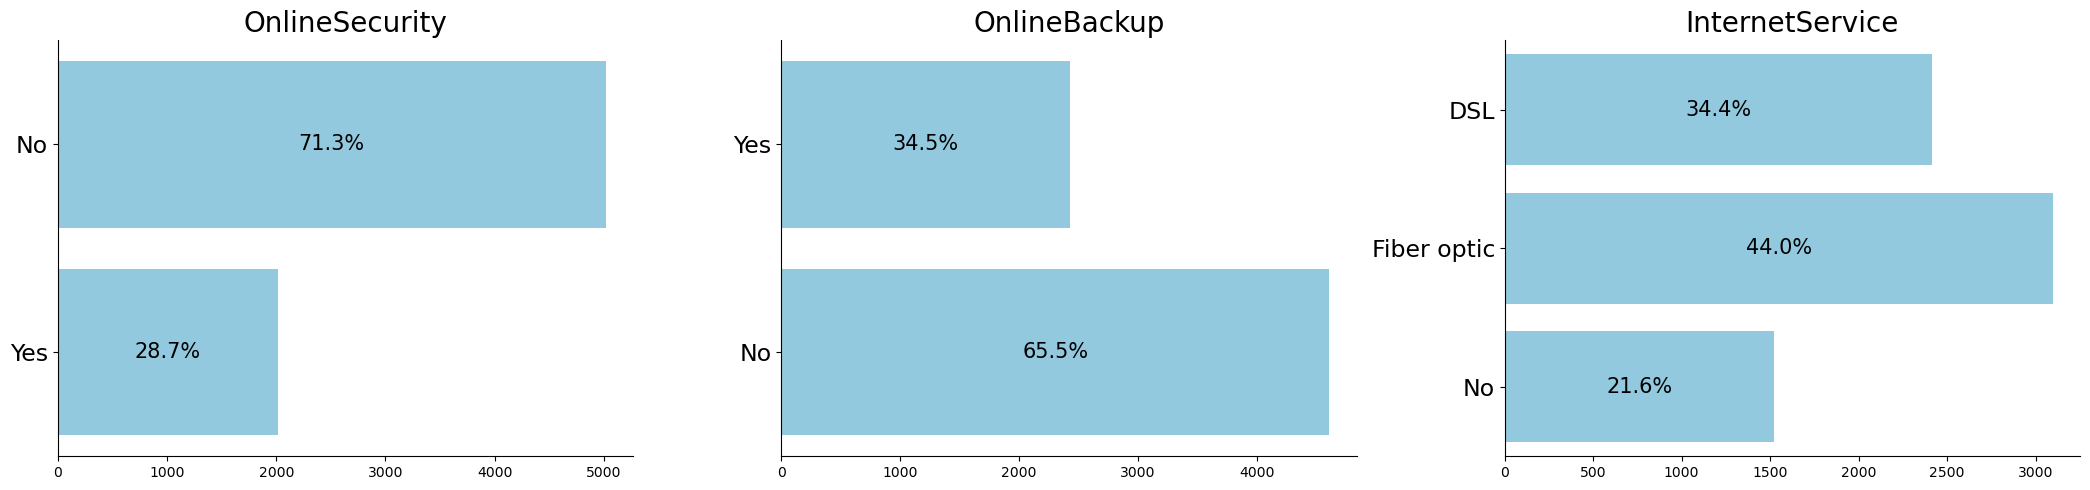

In [12]:
UVA_qlt(df, NetService)

<b>Summary</b>:

* Near 71.3% of our users don't use Online Security services.
* Around 65.5% of users have activated Online Backup and they are using this service.
* Among all users, 44% are using Fiber optic internet service, and DSL stands in the second stage with 34.43%. However, nearly 22% of users do not have any internet service.

##### **2.2.3 - Device**

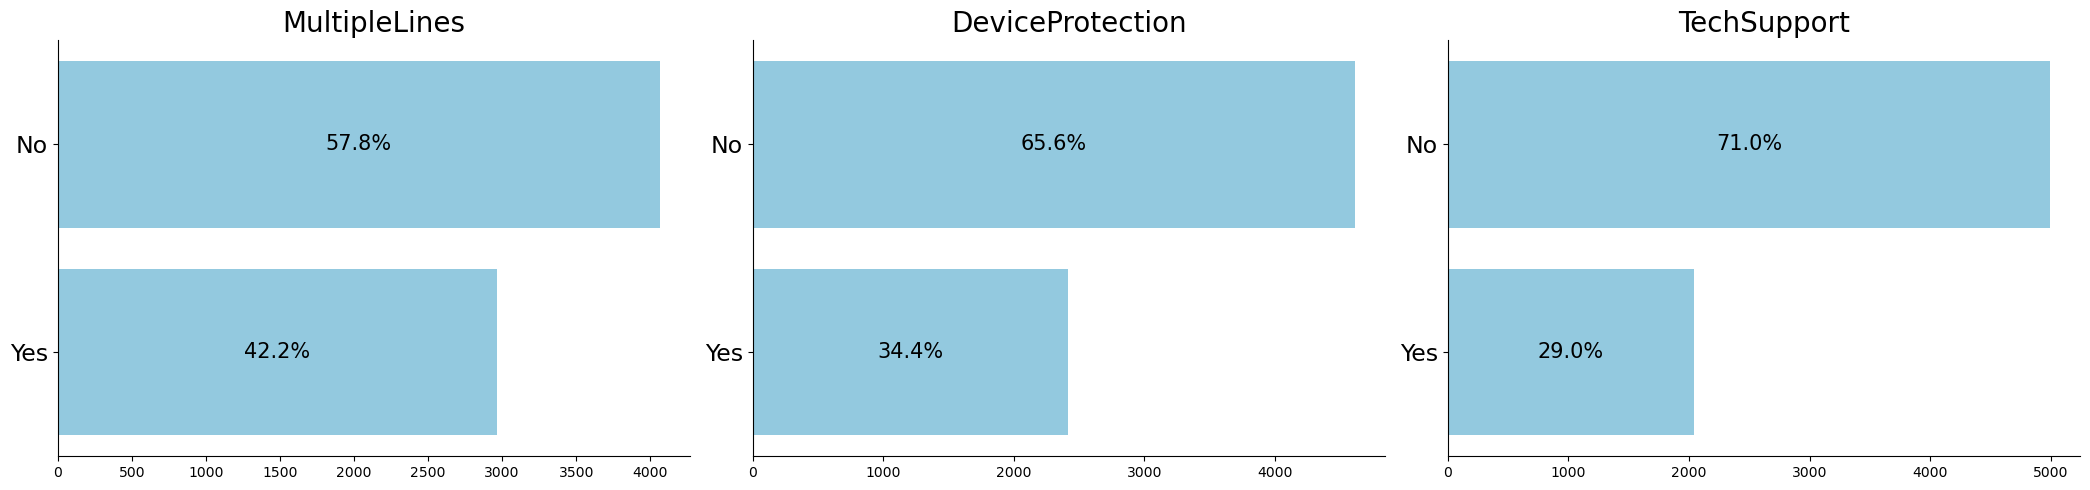

In [13]:
UVA_qlt(df, Device)

<b>Summary</b>:

* Near 58% of our users don't have multiple lines.
* Around 66% of users are unwilling to active device protection.
* ALso, jut 29% os users are using the technical support service.

##### **2.2.4 - GenInfo**

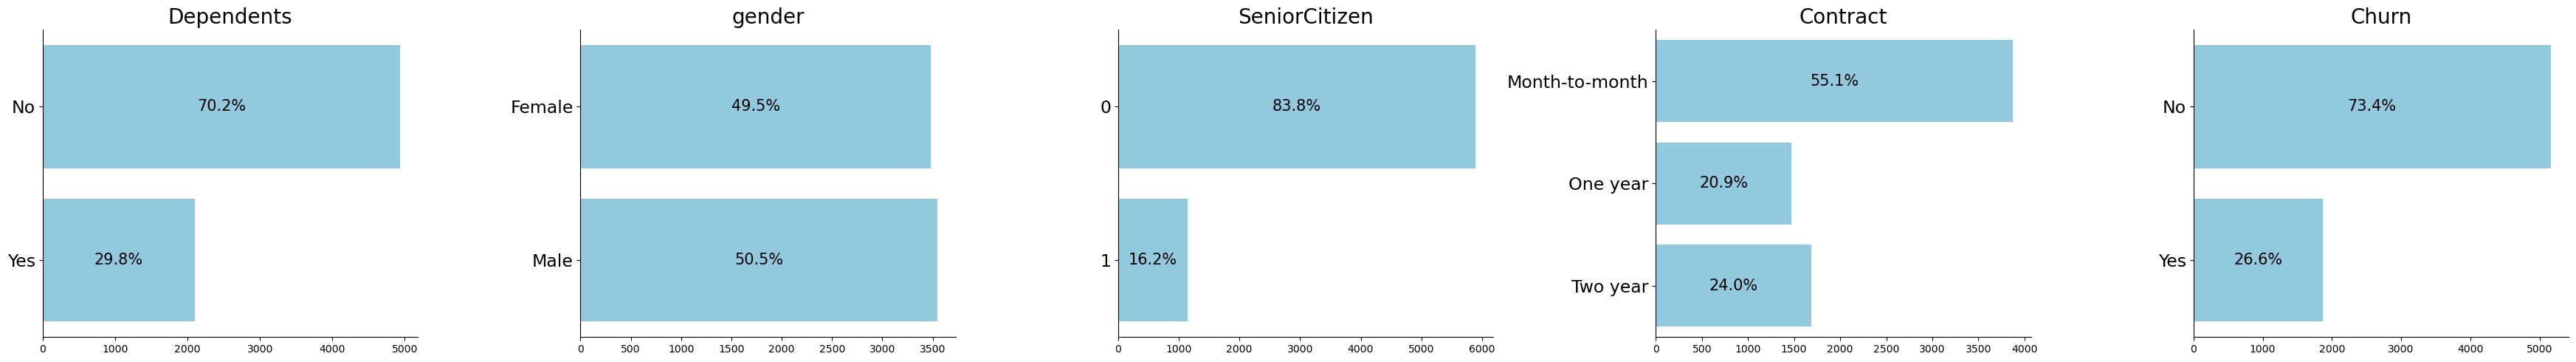

In [14]:
UVA_qlt(df, GenInfo)

<b>Summary</b>:

* More than 70% of users do not have any dependents in the company.
* We roughly witness an equal proportion of male and female users
* Senior citizen (older than 65 years old) accounts for just 18%.
* More than half of users have monthly contracts and Two years and one year follow it by 24% and 21, respectively.
* 74% of users didn't churn.

##### **2.2.5 - Entertainment**

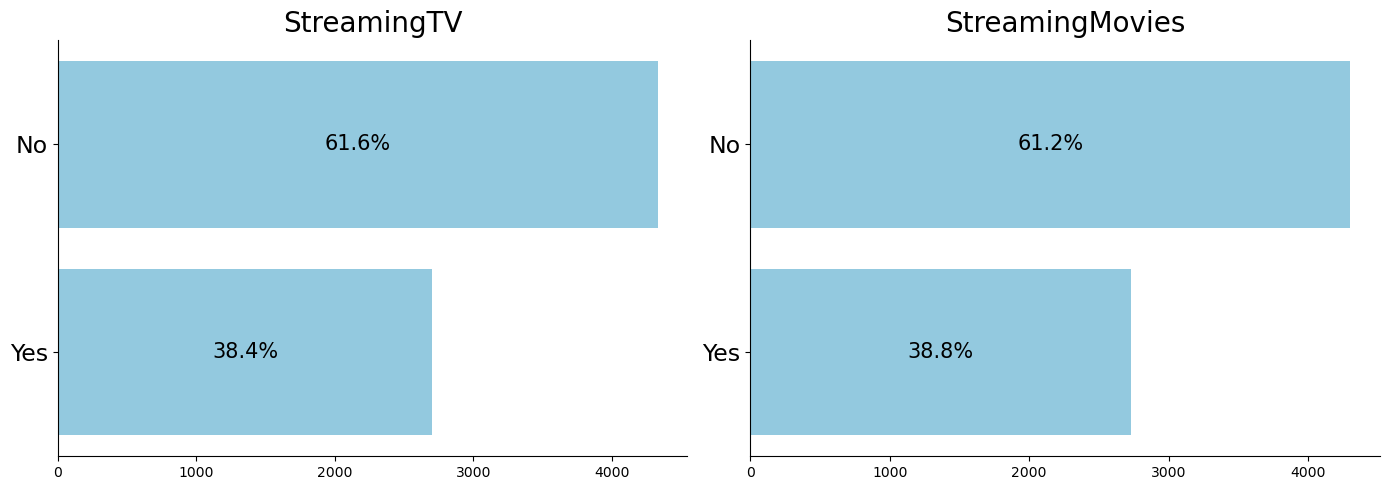

In [15]:
UVA_qlt(df, Entertainment)

<b>Summary</b>:

* More than 61% of users do not use streaming tv and movies.

##### **2.2.6 - Billing**

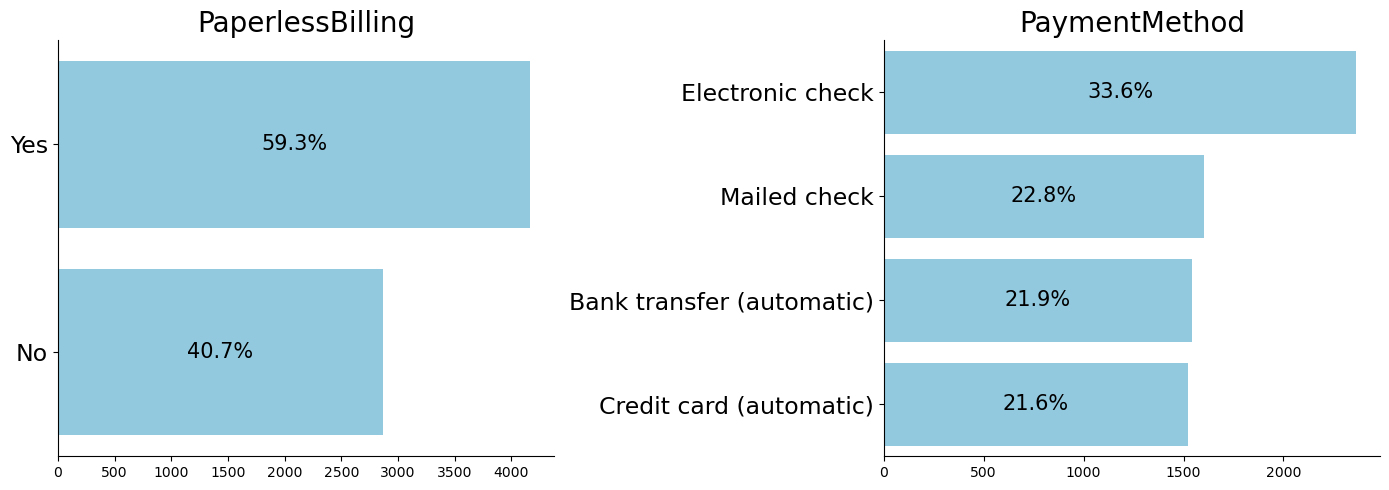

In [16]:
UVA_qlt(df, Billing)

<b>Summary</b>:

* Surpsisingly, around 60% of users are willing to have paperless billing and it is good new for the environment.
* Nearly 34% of users pay their billing via electronic check. Other type of contract stand in the second place with 22%

## **3-Bivariat Analysis**

Bivariate analysis refers to the analysis of two or more variables simultaneously to determine the relationship between them. It is a statistical technique used to explore associations, dependencies, or correlations between two variables in a dataset.

#### **3.1 - Numerical vs. Numerical**

In this section we will be performing bivariate analysis for the Numerical Numerical combination of variables

##### **3.1.1 - Declare Variables**

In [17]:
num_df = df.select_dtypes(include=['float64', 'Int64', 'int64'])

##### **3.1.2 - Correlation Matrix**

Now, we can create correlation matrix to see the relationship between numerical variables and fine pearson score.

Text(0.5, 1.0, '')

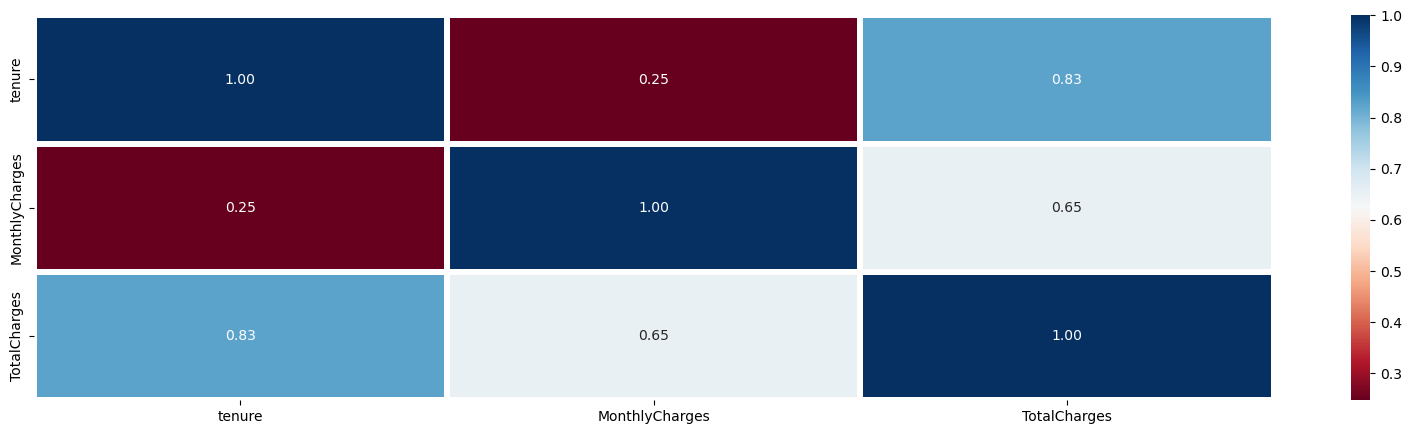

In [18]:
plt.figure(figsize=(20, 5), dpi=100)
correlation = num_df.corr(method='pearson')
sns.heatmap(correlation, annot=True, fmt=".2f", linewidth=3, cmap="RdBu")
plt.title('')

* **Perfect Correlation**: It make sense each variable has the perfect correlation by itself.
* **Strong Correlation**: The correlation between 0.7 to 0.99, means we have Strong correlation. We see we have strong positive relationship between `tenure` and `TotalCharges`. If one of increases, it leads to have increase in the other one.
* **Moderate Correlation**: The correlation between 0.3 to 0.7, means we have moderate correlation. 
* **Weak Correlation**: The correlation between 0.01 to 0.3, means we have weak correlation. We see we have weak positive relationship between `tenure` and `MonthlyCharges`. If one of increases, it leads to have increase in the other one.

##### **3.1.3 - Scatter Plot**

Now we can look over them closely with the help of scatter plots. But, the scatter plot is is not meaningful due to the presence of outliers. One way to visualise them is to take logarithm transform of every variable is to nullify the effect of outliers.

In [19]:
num_df_log = num_df.copy()

for column in num_df_log:
  mini=1
  if num_df_log[column].min()<0:
    mini =  abs(num_df_log[column].min()) + 1
  
  num_df_log[column] = [i+mini for i in num_df_log[column]]
  num_df_log[column] = num_df_log[column].map(lambda x : np.log(x))

<Figure size 640x480 with 0 Axes>

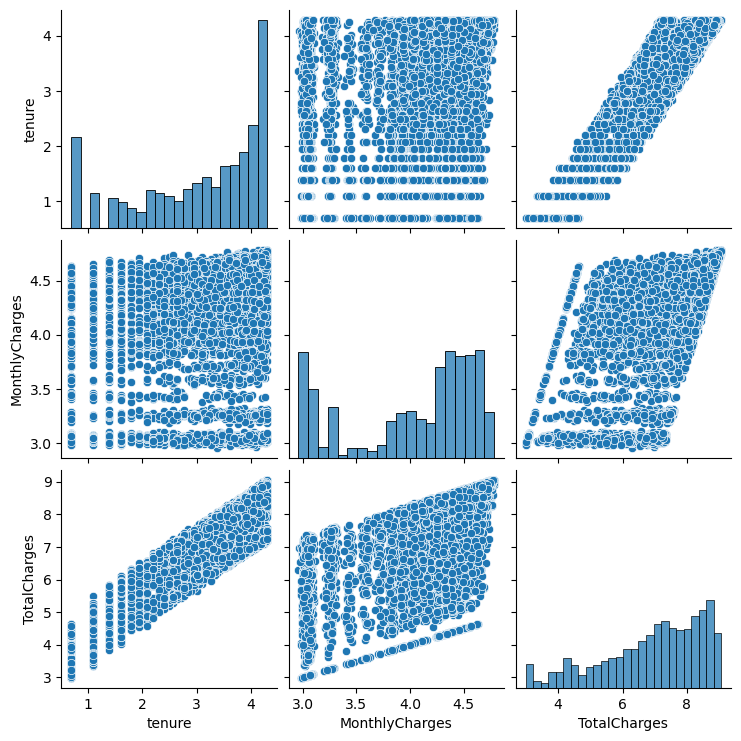

In [20]:
plt.figure(dpi=100)
sns.pairplot(num_df_log)
plt.show()

#### **3.2 - Numerical vs. Categorical**

In this section we will working with hypothesis testing. We will be performing the hypothesis testing as we go along plotting the graphs.The null and alternate hypothesis in this section are:
* $H_0$: There is a no significant difference between them.
* $H_a$: There is a significant difference between them.

##### **3.2.1 - Build Function**

In [21]:
def Cat_Num_test(Cat, Num, a):
    grouped_data = df.groupby(Cat)[Num].apply(list)
    f_statistic, p_value = stats.f_oneway(*grouped_data)
    alpha = a 
    
    if p_value < alpha:
        print("Reject null. It means there is a significant difference")
    else:
        print("Fail to reject null. It means there is no significant difference")

In [22]:
def Cat_Num_plot(Cat, Num):
    fig, axes = plt.subplots(1, 3, figsize = (18, 6))
    # Bar plot of mean monthly charges by gender
    sns.barplot(data = df, x=Cat, y=Num, ax=axes[0])
    axes[0].set_xlabel('{}'.format(Cat))
    axes[0].set_ylabel('{}'.format(Num))
    axes[0].set_title('')
    
    # Box plot of monthly charges by gender
    sns.boxplot(data = df, x=Cat, y=Num, ax=axes[2])
    axes[2].set_xlabel('{}'.format(Cat))
    axes[2].set_ylabel('{}'.format(Num))
    axes[2].set_title('')
    
    # Histogram of monthly charges
    sns.histplot(data = df, x=Num, hue=Cat, kde=True, ax=axes[1])
    axes[1].set_xlabel('{}'.format(Num))
    axes[1].set_ylabel('Count')
    axes[1].set_title('')
    
    #plot
    plt.tight_layout()
    plt.show()

##### **3.2.2 - Variable Relationships**

Now, we can test hypothesis test between `Churn` and numerical variables.

> <b><i>Hypothesis 1: The churned customers did not have high tenure</i></b>

* $H_0$: The average tenure of churned customers is equal to the average tenure of not churned customers.
* $H_a$: The average tenure of churned customers is different from the average tenure of not churned customers

In [23]:
Cat_Num_test('Churn', 'tenure', 0.05)

Reject null. It means there is a significant difference


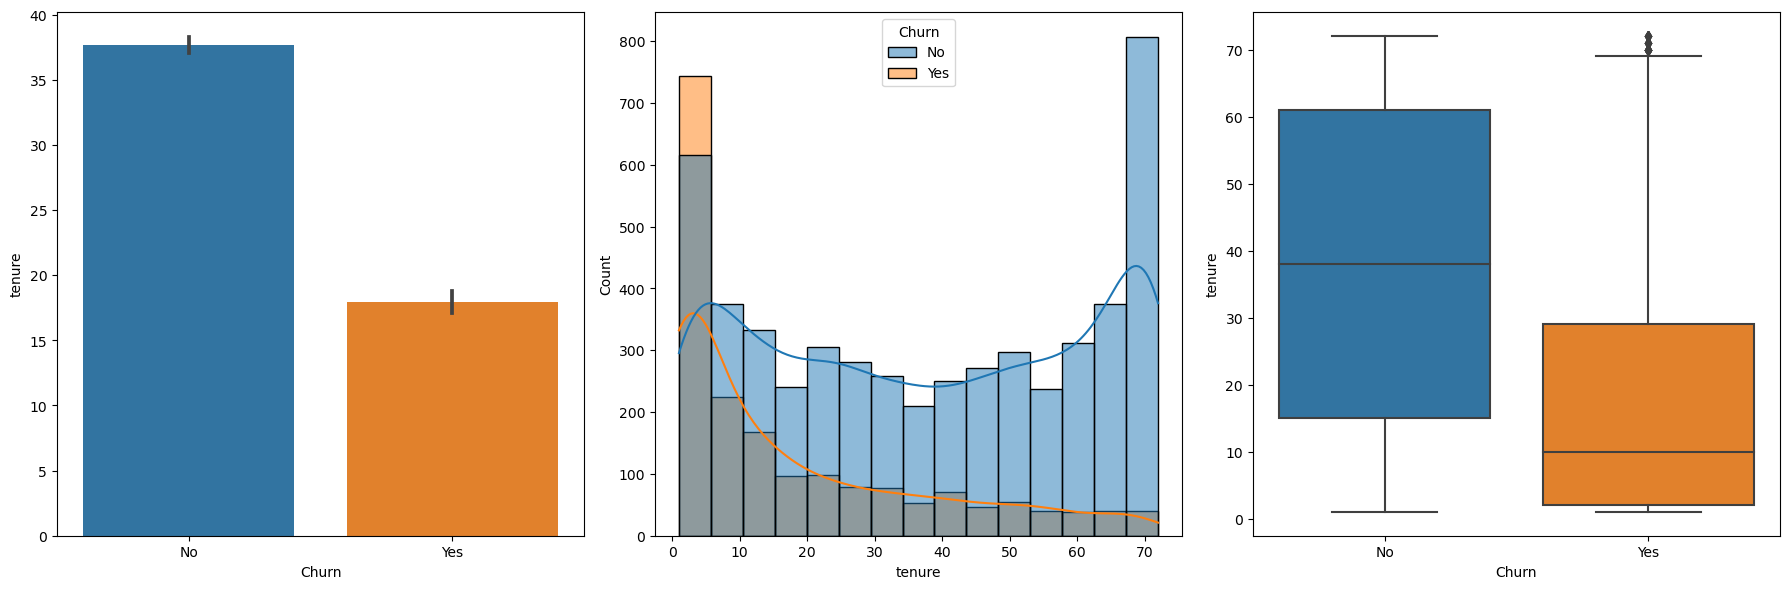

In [24]:
Cat_Num_plot('Churn', 'tenure')

The result shows that the customer who did not churn have been using our services more than churned customer interms of time (tenure)

<hr>

> <b><i>Hypothesis 2: The churned customers paied monthly charge more than unchurned customers.</i></b>

* $H_0$: The average monhtly charge of churned customers is equal to the average monhtly charge of not churned customers.
* $H_a$: The average monhtly charge of churned customers is different from the average monhtly charge of not churned customers

In [25]:
Cat_Num_test('Churn', 'MonthlyCharges', 0.05)

Reject null. It means there is a significant difference


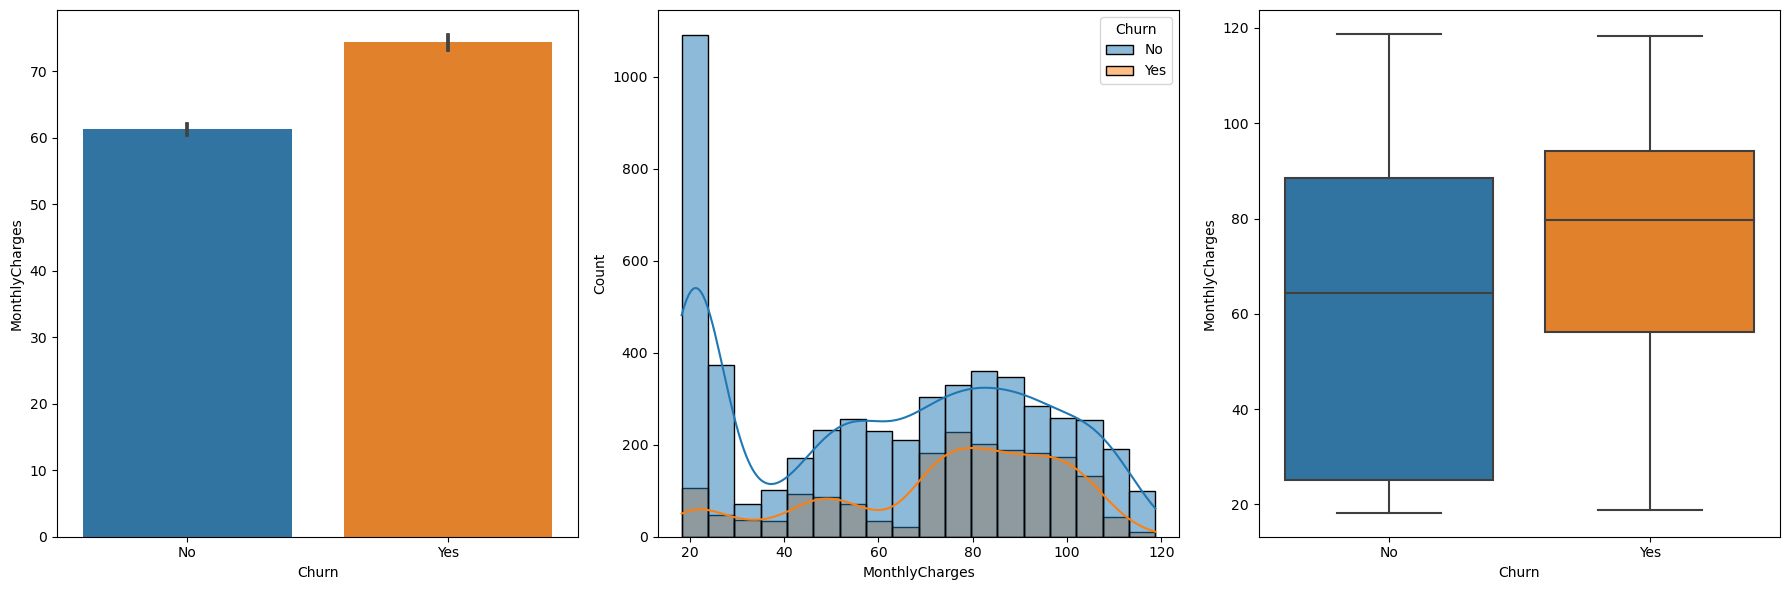

In [26]:
Cat_Num_plot('Churn', 'MonthlyCharges')

The result shows the churned customer paid monthly charge more than unchurned customers.

<hr>

> <b><i>Hypothesis 3: The churned customers paid equal average total charges as unchurned customers.</i></b>

* $H_0$: The churned customers paid the same average total charges as unchurned customers.
* $H_a$: The churned customers did not pay the same average total charges as unchurned customers.

In [27]:
Cat_Num_test('Churn', 'TotalCharges', 0.05)

Reject null. It means there is a significant difference


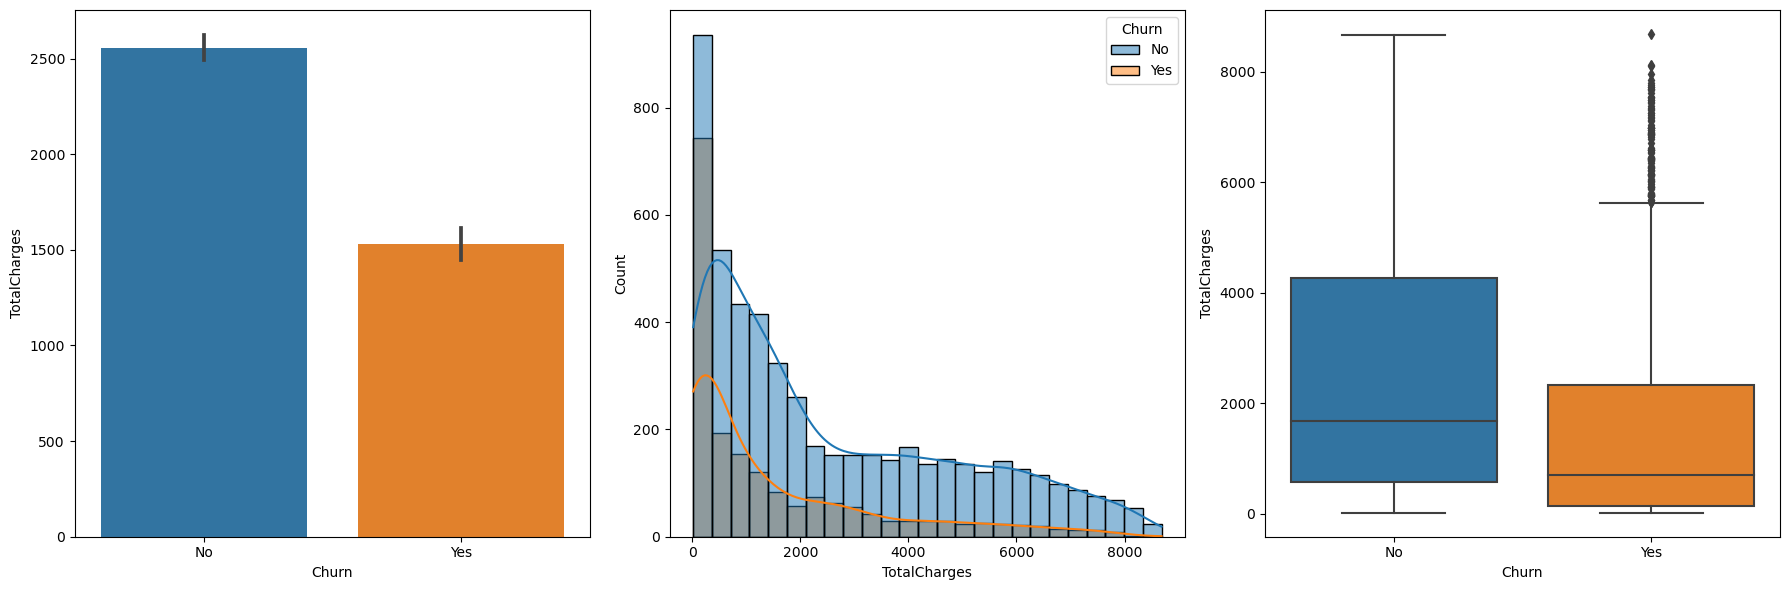

In [28]:
Cat_Num_plot('Churn', 'TotalCharges')

The result shows the customers ones did not churn, paid total charge more than churned customers. However, this is analyze with pure data, and we did not remove outliers.

#### **3.3 - Categorical vs. Categorical**

For realizing whether we have a relationship between categorical variables, we use the Chi-Square test. This test has two hypotheses:
* $H_0$: There is no association between these categorical variables.
* $H_a$: There is an association between these categorical variables.

After that, we should know the strength of this association (if there is). For this aim, we use Cramér's V that ranges from 0 to 1, where 0 indicates no association, and 1 indicates a strong association.

Finally, for knowing which label has the most impact on another categorical variable, we use crosstab.

##### **3.3.1 - Build Function**

In [29]:
def CatBivar(Target, Cat):
    observed = pd.crosstab(df[Target], df[Cat])
    chi2, p_value, dof, expected = chi2_contingency(observed)
    
    # Calculating Cramér's V
    n = np.sum(observed)
    phi = np.sqrt(chi2 / n)
    r, k = observed.shape
    cramers_v = phi / np.sqrt(min(r - 1, k - 1))
      
    # Calculate the strength
    percentage_df = observed.div(observed.sum(axis=1), axis=0) * 100

    # Create output text
    output_text = [
        "Percentage by {}:\n{}".format(Cat, percentage_df),
        "p-value:\n{}".format(p_value),
        "Cramér's V:\n{}".format(cramers_v)
    ]
    
    return "\n\n".join(output_text)

##### **3.3.2 - Variable Relationships**

Now, in this section we analyze the relationship between all categorical variables and `Churn`.

> **Dependents**

In [35]:
print(CatBivar('Churn', 'Dependents'))

Percentage by Dependents:
Dependents         No        Yes
Churn                           
No          65.659500  34.340500
Yes         82.557517  17.442483

p-value:
2.0196592017051303e-42

Cramér's V:
Dependents
No     0.194346
Yes    0.297938
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>having dependents</u> brings more impact.

> **MultipleLines**

In [40]:
print(CatBivar('Churn', 'MultipleLines'))

Percentage by MultipleLines:
MultipleLines         No        Yes
Churn                              
No             58.996707  41.003293
Yes            54.521134  45.478866

p-value:
0.0008694082815826175

Cramér's V:
MultipleLines
No     0.052225
Yes    0.061129
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>having MultipleLines</u> brings more impact. However, there is no big differenece bwteen having and not having MultipleLines.

> **OnlineSecurity**

In [41]:
print(CatBivar('Churn', 'OnlineSecurity'))

Percentage by OnlineSecurity:
OnlineSecurity         No        Yes
Churn                               
No              66.686035  33.313965
Yes             84.216158  15.783842

p-value:
1.37424000884718e-46

Cramér's V:
OnlineSecurity
No     0.202346
Yes    0.319286
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>having OnlineSecurity</u> brings more impact.

> **OnlineBackup**

In [42]:
print(CatBivar('Churn', 'OnlineBackup'))

Percentage by OnlineBackup:
OnlineBackup         No        Yes
Churn                             
No            63.160953  36.839047
Yes           72.017121  27.982879

p-value:
6.259257129714726e-12

Cramér's V:
OnlineBackup
No     0.101269
Yes    0.139582
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>having OnlineBackup</u> brings more impact.

> **DeviceProtection**

In [43]:
print(CatBivar('Churn', 'DeviceProtection'))

Percentage by DeviceProtection:
DeviceProtection         No        Yes
Churn                                 
No                63.722642  36.277358
Yes               70.840021  29.159979

p-value:
3.346074945648779e-08

Cramér's V:
DeviceProtection
No     0.081298
Yes    0.112303
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>having DeviceProtection</u> brings more impact.

> **TechSupport**

In [44]:
print(CatBivar('Churn', 'TechSupport'))

Percentage by TechSupport:
TechSupport         No        Yes
Churn                            
No           66.492349  33.507651
Yes          83.413590  16.586410

p-value:
3.2328683255491206e-43

Cramér's V:
TechSupport
No     0.195075
Yes    0.305157
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>having TechSupport</u> brings more impact.

> **StreamingTV**

In [45]:
print(CatBivar('Churn', 'StreamingTV'))

Percentage by StreamingTV:
StreamingTV         No        Yes
Churn                            
No           63.412745  36.587255
Yes          56.447298  43.552702

p-value:
1.3164336109407092e-07

Cramér's V:
StreamingTV
No     0.080197
Yes    0.101491
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>having StreamingTV</u> brings more impact.

> **StreamingMovies**

In [46]:
print(CatBivar('Churn', 'StreamingMovies'))

Percentage by StreamingMovies:
StreamingMovies         No        Yes
Churn                                
No               62.947899  37.052101
Yes              56.233280  43.766720

p-value:
3.857900347663822e-07

Cramér's V:
StreamingMovies
No     0.077397
Yes    0.097129
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>having StreamingMovies</u> brings more impact.

> **PaperlessBilling**

In [47]:
print(CatBivar('Churn', 'PaperlessBilling'))

Percentage by PaperlessBilling:
PaperlessBilling         No        Yes
Churn                                 
No                46.387759  53.612241
Yes               25.093633  74.906367

p-value:
8.236203353962564e-58

Cramér's V:
PaperlessBilling
No     0.299484
Yes    0.248254
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>not having PaperlessBilling</u> brings more impact.

> **gender**

In [48]:
print(CatBivar('Churn', 'gender'))

Percentage by gender:
gender     Female       Male
Churn                       
No      49.273678  50.726322
Yes     50.240770  49.759230

p-value:
0.4904884707065509

Cramér's V:
gender
Female    0.011684
Male      0.011574
dtype: float64


The outcome shows <u>there is not</u> association between these two variable.

> **InternetService**

In [49]:
print(CatBivar('Churn', 'InternetService'))

Percentage by InternetService:
InternetService        DSL  Fiber optic         No
Churn                                             
No               37.904319    34.844083  27.251598
Yes              24.558587    69.395399   6.046014

p-value:
5.831198962236941e-159

Cramér's V:
InternetService
DSL            0.549193
Fiber optic    0.485146
No             0.692391
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>not having InternetService</u> brings more impact.

> **Contract**

In [50]:
print(CatBivar('Churn', 'Contract'))

Percentage by Contract:
Contract  Month-to-month   One year   Two year
Churn                                         
No             42.998257  25.295371  31.706372
Yes            88.550027   8.881755   2.568218

p-value:
7.326182186264635e-257

Cramér's V:
Contract
Month-to-month    0.551724
One year          0.895166
Two year          0.836676
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>having One year contract</u> brings more impact.

> **PaymentMethod**

In [51]:
print(CatBivar('Churn', 'PaymentMethod'))

Percentage by PaymentMethod:
PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                             24.869262                24.966105   
Yes                            13.804173                12.413055   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                    25.062948     25.101685  
Yes                   57.303371     16.479401  

p-value:
1.4263098511062525e-139

Cramér's V:
PaymentMethod
Bank transfer (automatic)    0.646967
Credit card (automatic)      0.651418
Electronic check             0.522407
Mailed check                 0.634340
dtype: float64


The outcome shows <u>there is</u> association between these two variable, and <u>Credit card</u> brings more impact.